In [1]:
import sklearn as skl
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import (roc_auc_score, 
                             f1_score, 
                             cohen_kappa_score, 
                             accuracy_score, 
                             balanced_accuracy_score, 
                             recall_score, 
                             precision_score, 
                             balanced_accuracy_score, 
                             make_scorer, 
                             matthews_corrcoef)


from sklearn.feature_selection import VarianceThreshold, SelectFromModel

from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder, LabelBinarizer

In [2]:
#file_radiomics = "/Users/joaosantinha/Downloads/emidec-dataset-1.0.1/output_myocardium_original_and_conv.csv"
file_radiomics = "/Users/joaosantinha/Downloads/emidec-dataset-1.0.1/output_original_bw_myocardium_conv.csv"
#file_radiomics = "/Users/joaosantinha/Downloads/emidec-dataset-1.0.1/output_norm_path_training_cent3slices.csv"
df = pd.read_csv(file_radiomics, index_col="ID")
df

,Image,Mask,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,...,lbp-2D_gldm_LargeDependenceLowGrayLevelEmphasis,lbp-2D_gldm_LowGrayLevelEmphasis,lbp-2D_gldm_SmallDependenceEmphasis,lbp-2D_gldm_SmallDependenceHighGrayLevelEmphasis,lbp-2D_gldm_SmallDependenceLowGrayLevelEmphasis,lbp-2D_ngtdm_Busyness,lbp-2D_ngtdm_Coarseness,lbp-2D_ngtdm_Complexity,lbp-2D_ngtdm_Contrast,lbp-2D_ngtdm_Strength
ID,,,,,,,,,,,,,,,,,,,,,
Case_N052,/Users/joaosantinha/Downloads/emidec-dataset-1...,/Users/joaosantinha/Downloads/emidec-dataset-1...,v3.0.1,1.24.4,2.3.1,1.4.1,3.8.19,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.875, 2, 3...",55f932672b4a59fb04c177c0cef8e62d45674707,...,1.246055,0.249023,0.346247,3.626312,0.107203,71.478832,0.001146,13.323820,0.301018,0.010545
Case_N030,/Users/joaosantinha/Downloads/emidec-dataset-1...,/Users/joaosantinha/Downloads/emidec-dataset-1...,v3.0.1,1.24.4,2.3.1,1.4.1,3.8.19,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.875, 2, 3...",345104550a0b91d19d540111966634c48bb2f004,...,1.382768,0.236537,0.322977,3.437688,0.089111,57.152289,0.001736,10.845019,0.227505,0.013212
Case_N037,/Users/joaosantinha/Downloads/emidec-dataset-1...,/Users/joaosantinha/Downloads/emidec-dataset-1...,v3.0.1,1.24.4,2.3.1,1.4.1,3.8.19,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.875, 2, 3...",945bb7eee98603069e0e8382ffc649bfafca7134,...,1.122966,0.204687,0.327577,3.610864,0.085515,63.958835,0.001401,10.429794,0.202929,0.010549
Case_N006,/Users/joaosantinha/Downloads/emidec-dataset-1...,/Users/joaosantinha/Downloads/emidec-dataset-1...,v3.0.1,1.24.4,2.3.1,1.4.1,3.8.19,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.875, 2, 3...",7e677997deffffb335f6cfb8f8553417f225a7b7,...,1.134044,0.196603,0.328973,3.585098,0.093901,54.968232,0.001555,10.332916,0.194364,0.011684
Case_N065,/Users/joaosantinha/Downloads/emidec-dataset-1...,/Users/joaosantinha/Downloads/emidec-dataset-1...,v3.0.1,1.24.4,2.3.1,1.4.1,3.8.19,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.875, 2, 3...",ec14f15c6867e979c138d3f740321e8d8d7cf7f3,...,1.026382,0.187445,0.339377,3.646072,0.083234,34.323322,0.002329,11.169185,0.211763,0.018729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Case_N042,/Users/joaosantinha/Downloads/emidec-dataset-1...,/Users/joaosantinha/Downloads/emidec-dataset-1...,v3.0.1,1.24.4,2.3.1,1.4.1,3.8.19,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.875, 2, 3...",4aff0cf262c8889c8fc612356d2b942d415c44f5,...,1.356555,0.204227,0.303175,3.457601,0.076984,55.189076,0.001857,9.377505,0.174660,0.012920
Case_N020,/Users/joaosantinha/Downloads/emidec-dataset-1...,/Users/joaosantinha/Downloads/emidec-dataset-1...,v3.0.1,1.24.4,2.3.1,1.4.1,3.8.19,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.875, 2, 3...",170617f5ccb38ba47cc4174093db996b29a1c030,...,1.427247,0.199564,0.294692,3.280514,0.069027,51.357324,0.001849,9.377192,0.170352,0.013161
Case_N027,/Users/joaosantinha/Downloads/emidec-dataset-1...,/Users/joaosantinha/Downloads/emidec-dataset-1...,v3.0.1,1.24.4,2.3.1,1.4.1,3.8.19,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.875, 2, 3...",616e82b6ad857d0195bf01846a51c27215e705da,...,1.399331,0.232080,0.320850,3.526418,0.088577,88.979580,0.001095,11.075020,0.232974,0.008543


In [3]:
df_clean = df.drop(columns=['Image', 'Mask', 'diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy',
                           'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet',
                           'diagnostics_Versions_Python', 'diagnostics_Configuration_Settings',
                           'diagnostics_Configuration_EnabledImageTypes', 'diagnostics_Image-original_Hash',
                           'diagnostics_Image-original_Dimensionality', 'diagnostics_Image-original_Spacing',
                           'diagnostics_Image-original_Size', 'diagnostics_Image-original_Mean',
                           'diagnostics_Image-original_Minimum', 'diagnostics_Image-original_Maximum',
                           'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_Spacing',
                           'diagnostics_Mask-original_Size', 'diagnostics_Mask-original_BoundingBox',
                           'diagnostics_Mask-original_VoxelNum', 'diagnostics_Mask-original_VolumeNum',
                           'diagnostics_Mask-original_CenterOfMassIndex', 'diagnostics_Mask-original_CenterOfMass',
                           'diagnostics_Image-interpolated_Spacing', 'diagnostics_Image-interpolated_Size',
                           'diagnostics_Image-interpolated_Mean', 'diagnostics_Image-interpolated_Minimum',
                           'diagnostics_Image-interpolated_Maximum', 'diagnostics_Mask-interpolated_Spacing',
                           'diagnostics_Mask-interpolated_Size', 'diagnostics_Mask-interpolated_BoundingBox',
                           'diagnostics_Mask-interpolated_VoxelNum', 'diagnostics_Mask-interpolated_VolumeNum',
                           'diagnostics_Mask-interpolated_CenterOfMassIndex', 'diagnostics_Mask-interpolated_CenterOfMass',
                           'diagnostics_Mask-interpolated_Mean', 'diagnostics_Mask-interpolated_Minimum',
                           'diagnostics_Mask-interpolated_Maximum'])
df_clean

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,lbp-2D_gldm_LargeDependenceLowGrayLevelEmphasis,lbp-2D_gldm_LowGrayLevelEmphasis,lbp-2D_gldm_SmallDependenceEmphasis,lbp-2D_gldm_SmallDependenceHighGrayLevelEmphasis,lbp-2D_gldm_SmallDependenceLowGrayLevelEmphasis,lbp-2D_ngtdm_Busyness,lbp-2D_ngtdm_Coarseness,lbp-2D_ngtdm_Complexity,lbp-2D_ngtdm_Contrast,lbp-2D_ngtdm_Strength
ID,,,,,,,,,,,,,,,,,,,,,
Case_N052,0.928921,0.840408,62.461003,74.322239,78.504080,82.243921,67.212931,83.957299,97801.757812,69.039512,...,1.246055,0.249023,0.346247,3.626312,0.107203,71.478832,0.001146,13.323820,0.301018,0.010545
Case_N030,0.826043,0.775266,58.667365,75.673805,82.217794,83.216585,61.218104,84.889634,81394.042969,62.509810,...,1.382768,0.236537,0.322977,3.437688,0.089111,57.152289,0.001736,10.845019,0.227505,0.013212
Case_N037,0.933488,0.864655,75.386902,87.187272,89.800125,89.800125,82.329369,92.841431,103009.277344,81.388274,...,1.122966,0.204687,0.327577,3.610864,0.085515,63.958835,0.001401,10.429794,0.202929,0.010549
Case_N006,0.706250,0.684453,62.911536,91.915065,99.002841,98.236402,62.412439,100.797600,94630.371094,64.914973,...,1.134044,0.196603,0.328973,3.585098,0.093901,54.968232,0.001555,10.332916,0.194364,0.011684
Case_N065,0.942487,0.931547,69.763840,74.890281,85.959656,83.553875,67.212931,87.680617,73698.193359,70.583142,...,1.026382,0.187445,0.339377,3.646072,0.083234,34.323322,0.002329,11.169185,0.211763,0.018729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Case_N042,0.887396,0.835062,60.844996,72.862879,83.216585,83.216585,64.134868,85.096453,88006.347656,64.658219,...,1.356555,0.204227,0.303175,3.457601,0.076984,55.189076,0.001857,9.377505,0.174660,0.012920
Case_N020,0.919376,0.892616,68.739091,77.008578,85.302770,83.216585,70.580738,86.611561,85981.933594,70.799813,...,1.427247,0.199564,0.294692,3.280514,0.069027,51.357324,0.001849,9.377192,0.170352,0.013161
Case_N027,0.834130,0.746005,66.626888,89.311628,98.236402,100.623059,73.508609,100.692912,127192.382812,74.497479,...,1.399331,0.232080,0.320850,3.526418,0.088577,88.979580,0.001095,11.075020,0.232974,0.008543


In [4]:
df_clean["Label"] = df.index.map(lambda x: 1 if "P" in x else 0)
df_clean

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,lbp-2D_gldm_LowGrayLevelEmphasis,lbp-2D_gldm_SmallDependenceEmphasis,lbp-2D_gldm_SmallDependenceHighGrayLevelEmphasis,lbp-2D_gldm_SmallDependenceLowGrayLevelEmphasis,lbp-2D_ngtdm_Busyness,lbp-2D_ngtdm_Coarseness,lbp-2D_ngtdm_Complexity,lbp-2D_ngtdm_Contrast,lbp-2D_ngtdm_Strength,Label
ID,,,,,,,,,,,,,,,,,,,,,
Case_N052,0.928921,0.840408,62.461003,74.322239,78.504080,82.243921,67.212931,83.957299,97801.757812,69.039512,...,0.249023,0.346247,3.626312,0.107203,71.478832,0.001146,13.323820,0.301018,0.010545,0
Case_N030,0.826043,0.775266,58.667365,75.673805,82.217794,83.216585,61.218104,84.889634,81394.042969,62.509810,...,0.236537,0.322977,3.437688,0.089111,57.152289,0.001736,10.845019,0.227505,0.013212,0
Case_N037,0.933488,0.864655,75.386902,87.187272,89.800125,89.800125,82.329369,92.841431,103009.277344,81.388274,...,0.204687,0.327577,3.610864,0.085515,63.958835,0.001401,10.429794,0.202929,0.010549,0
Case_N006,0.706250,0.684453,62.911536,91.915065,99.002841,98.236402,62.412439,100.797600,94630.371094,64.914973,...,0.196603,0.328973,3.585098,0.093901,54.968232,0.001555,10.332916,0.194364,0.011684,0
Case_N065,0.942487,0.931547,69.763840,74.890281,85.959656,83.553875,67.212931,87.680617,73698.193359,70.583142,...,0.187445,0.339377,3.646072,0.083234,34.323322,0.002329,11.169185,0.211763,0.018729,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Case_N042,0.887396,0.835062,60.844996,72.862879,83.216585,83.216585,64.134868,85.096453,88006.347656,64.658219,...,0.204227,0.303175,3.457601,0.076984,55.189076,0.001857,9.377505,0.174660,0.012920,0
Case_N020,0.919376,0.892616,68.739091,77.008578,85.302770,83.216585,70.580738,86.611561,85981.933594,70.799813,...,0.199564,0.294692,3.280514,0.069027,51.357324,0.001849,9.377192,0.170352,0.013161,0
Case_N027,0.834130,0.746005,66.626888,89.311628,98.236402,100.623059,73.508609,100.692912,127192.382812,74.497479,...,0.232080,0.320850,3.526418,0.088577,88.979580,0.001095,11.075020,0.232974,0.008543,0


In [5]:
Y = df_clean["Label"]
X = df_clean.drop(columns="Label")

In [6]:
# test_prcntg = 0.3 #@param {type:"slider", min:0.1, max:0.4, step:0.05}

random_state_value = 1 # necessary for reproducibility

MI_test_pts = ['Case_P050', 'Case_P087', 'Case_P001', 'Case_P010', 'Case_P017',
       'Case_P029', 'Case_P090', 'Case_P038', 'Case_N052', 'Case_N016',
       'Case_P100', 'Case_P043', 'Case_P051', 'Case_N030', 'Case_P007',
       'Case_P088', 'Case_N025', 'Case_P076', 'Case_N046', 'Case_N054',
       'Case_N049', 'Case_N041', 'Case_N023', 'Case_P026', 'Case_P031',
       'Case_N024', 'Case_P064', 'Case_P021', 'Case_P015', 'Case_P094']

# X_train, X_test, Y_train, Y_test = train_test_split(
#     X, Y, test_size=test_prcntg, random_state=random_state_value, stratify=Y.to_list())
y_test = Y.loc[MI_test_pts]
X_test = X.loc[MI_test_pts]

y_train = Y.drop(index=MI_test_pts)
X_train = X.drop(index=MI_test_pts)

In [7]:
optimization_metric = "MCC" #@param ["AUC", "MCC", "Kappa","F1", "Accuracy", "Sensitivity", "Specificity", "PPV", "NPV", "BalancedAcc"]

if optimization_metric == "AUC":
    score_str = 'roc_auc'
elif optimization_metric == "MCC":
    score_str = make_scorer(matthews_corrcoef)
elif optimization_metric == "Kappa":
    score_str = make_scorer(cohen_kappa_score)
elif optimization_metric == "F1":
    score_str = 'f1'
elif optimization_metric == "Accuracy":
    score_str = 'accuracy'
elif optimization_metric == "Sensitivity":
    score_str = 'recall'
elif optimization_metric == "Specificity":
    score_str = make_scorer(recall_score, pos_label=0)
elif optimization_metric == "PPV":
    score_str = 'precision'
elif optimization_metric == "NPV":
    score_str = make_scorer(precision_score, pos_label=0)
elif optimization_metric == "BalancedAcc":
    score_str = 'balanced_accuracy'

# random_state_value = 1

score_group = {'AUC': 'roc_auc', 'MCC': make_scorer(matthews_corrcoef) ,
               'Kappa': make_scorer(cohen_kappa_score), 
               'F1': 'f1', 'Accuracy': 'accuracy', 
               'Sensitivity': 'recall', 
               'Specificity': make_scorer(recall_score, pos_label=0),
               'PPV': 'precision', 
               'NPV': make_scorer(precision_score, pos_label=0),
               'BalancedAcc': 'balanced_accuracy'}

score_refit_str = optimization_metric

In [8]:
feature_selection_method = "None" #@param ["None", "SVC-linear-l1", "LogisticRegression-l1", "RandomForest"]

if feature_selection_method == "None":
    fs_method = None
elif feature_selection_method == "SVC-linear-l1":
    fs_method = SelectFromModel(LinearSVC(penalty="l1", loss="squared_hinge", dual=False))
elif feature_selection_method == "LogisticRegression-l1":
    fs_method = SelectFromModel(LogisticRegression(penalty="l1", solver='saga', random_state=random_state_value))
else:#if optimization_metric == "RandomForest":
    fs_method = SelectFromModel(RandomForestClassifier())


In [9]:
SVM_classifier = True #@param {type:"boolean"}
LogisticRegression_classifier = True #@param {type:"boolean"}
RandomForest_classifier = True #@param {type:"boolean"}
# MLP_classifier = True #@param {type:"boolean"}
NaiveBayes_classifier = True #@param {type:"boolean"}
KNN_classifier = True #@param {type:"boolean"}
GradientBoosting_classifier = True #@param {type:"boolean"}

In [10]:
df_ncv_scores = pd.DataFrame(columns = ['Classifier', 'Nested-CV Mean', 'Nested-CV Std'])
if SVM_classifier:
    pipe_svc = make_pipeline(StandardScaler(),
                             fs_method,
                             VarianceThreshold(),
                         SVC(random_state=random_state_value, class_weight="balanced"))

    param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

    param_grid_svc = [{'svc__C': param_range, 
                  'svc__kernel': ['linear']},
                  {'svc__C': param_range, 
                  'svc__gamma': param_range, 
                  'svc__kernel': ['rbf']}]

    gs_svc = GridSearchCV(estimator=pipe_svc, 
                      param_grid=param_grid_svc, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_scv = cross_val_score(gs_svc, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['SVM'], 'Nested-CV Mean': [np.mean(scores_scv)], 'Nested-CV Std': [np.std(scores_scv)]}, columns = ['Classifier', 'Nested-CV Mean', 'Nested-CV Std'])
    df_ncv_scores = df_ncv_scores.append(df_score)
    
if LogisticRegression_classifier:
    pipe_lr = make_pipeline(StandardScaler(),
                             fs_method,
                            VarianceThreshold(),
                        LogisticRegression(random_state=random_state_value, #penalty='elasticnet', 
                                           solver='saga', class_weight="balanced"))

    param_range_lr = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

    param_range_reg_lr = np.linspace(0,1,11)

    param_range_penalty = ['l1']#, 'elasticnet']

    param_grid_lr = {'logisticregression__penalty': param_range_penalty,
                     'logisticregression__C': param_range_lr,
                    #  'logisticregression__l1_ratio': param_range_reg_lr
                     }

    gs_lr = GridSearchCV(estimator=pipe_lr, 
                      param_grid=param_grid_lr, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_lr = cross_val_score(gs_lr, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['Logistic Regression'], 'Nested-CV Mean': [np.mean(scores_lr)], 'Nested-CV Std': [np.std(scores_lr)]})
    df_ncv_scores = df_ncv_scores.append(df_score)

if RandomForest_classifier:
    pipe_rf = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        RandomForestClassifier(n_jobs=-1, class_weight="balanced_subsample", random_state=random_state_value))

    param_range_rf = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

    param_grid_rf = {'randomforestclassifier__n_estimators': param_range_rf,
                    'randomforestclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    gs_rf = GridSearchCV(estimator=pipe_rf, 
                      param_grid=param_grid_rf, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_rf = cross_val_score(gs_rf, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['Random Forest'], 'Nested-CV Mean': [np.mean(scores_rf)], 'Nested-CV Std': [np.std(scores_rf)]})
    df_ncv_scores = df_ncv_scores.append(df_score)

# if MLP_classifier:
#     pipe_mlp = make_pipeline(StandardScaler(),
#                              VarianceThreshold(),
#                         MLPClassifier(random_state=random_state_value, activation='adaptive'))

#     param_hidden_layer_sizes_mlp = [50, 100, 200, 500, 1000, 2000, 4000]
#     param_learnrate_mlp = [0.0001, 0.001, 0.01, 0.1]

#     param_grid_mlp = {'mlpclassifier__hidden_layer_sizes': param_hidden_layer_sizes_mlp,
#                     'mlpclassifier__activation': ['logistic', 'tanh', 'relu'],
#                     'mlpclassifier__learning_rate_init':param_learnrate_mlp}

#     gs_mlp = GridSearchCV(estimator=pipe_mlp, 
#                       param_grid=param_grid_mlp, 
#                       scoring=score_str, 
#                       refit=True,
#                       cv=2,
#                       n_jobs=-1)

#     scores_mlp = cross_val_score(gs_mlp, X_train, y_train, 
#                             scoring=score_str, cv=5)
#     print('MLP CV %s: %.3f +/- %.3f' % (score_str, np.mean(scores_mlp),
#                                           np.std(scores_mlp)))
#     df_score = pd.DataFrame(data={'Classifier': ['MLP'], 'Nested-CV Mean': [np.mean(scores_mlp)], 'Nested-CV Std': [np.std(scores_mlp)]})
#     df_ncv_scores = df_ncv_scores.append(df_score)

if NaiveBayes_classifier:
    pipe_nb = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        GaussianNB())

    param_grid_nb = {}

    gs_nb = GridSearchCV(estimator=pipe_nb, 
                      param_grid=param_grid_nb, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_nb = cross_val_score(gs_nb, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['Naive Bayes'], 'Nested-CV Mean': [np.mean(scores_nb)], 'Nested-CV Std': [np.std(scores_nb)]})
    df_ncv_scores = df_ncv_scores.append(df_score)

if KNN_classifier:
    pipe_knn = make_pipeline(StandardScaler(),
                             VarianceThreshold(),
                             fs_method,
                        KNeighborsClassifier(n_jobs=-1)) # random_state=random_state_value, 

    param_n_neighbors_knn = [2, 3, 4, 5, 6, 7, 8]

    param_grid_knn = {'kneighborsclassifier__n_neighbors': param_n_neighbors_knn,
                    'kneighborsclassifier__weights': ['uniform', 'distance']}

    gs_knn = GridSearchCV(estimator=pipe_knn, 
                      param_grid=param_grid_knn, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_knn = cross_val_score(gs_knn, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['KNN'], 'Nested-CV Mean': [np.mean(scores_knn)], 'Nested-CV Std': [np.std(scores_knn)]})
    df_ncv_scores = df_ncv_scores.append(df_score)

if GradientBoosting_classifier:
    pipe_gb = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        GradientBoostingClassifier(random_state=random_state_value))

    param_range_gb = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
    param_learnrate_gb = [0.0001, 0.001, 0.01, 0.1]

    param_grid_gb = {'gradientboostingclassifier__n_estimators': param_range_gb,
                    'gradientboostingclassifier__learning_rate': param_learnrate_gb}

    gs_gb = GridSearchCV(estimator=pipe_gb, 
                      param_grid=param_grid_gb, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_gb = cross_val_score(gs_gb, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['Gradient Boosting'], 'Nested-CV Mean': [np.mean(scores_gb)], 'Nested-CV Std': [np.std(scores_gb)]})
    df_ncv_scores = df_ncv_scores.append(df_score)

df_ncv_scores.sort_values(by=df_ncv_scores.columns[1], ascending=False)

/var/folders/1h/5r1_h3k53gx5k92ps_3wvvs40000gn/T/ipykernel_10954/2971790718.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ncv_scores = df_ncv_scores.append(df_score)
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:3

,Classifier,Nested-CV Mean,Nested-CV Std
0,Logistic Regression,0.649338,0.158277
0,SVM,0.518021,0.256412
0,Random Forest,0.472416,0.371357
0,KNN,0.343527,0.220076
0,Gradient Boosting,0.256478,0.160311
0,Naive Bayes,0.182836,0.210461


In [11]:
selected_model = 'LogisticRegression' #@param ['SVM', 'LogisticRegression', 'RandomForest', 'NaiveBayes', 'KNN', 'GradientBoosting']

number_folds = 4

if selected_model == 'SVM':
  pipe_svc = make_pipeline(StandardScaler(),
                           VarianceThreshold(),
                           fs_method,
                           SVC(random_state=random_state_value, class_weight="balanced"))

  param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

  param_grid_svc = [{'svc__C': param_range, 
                'svc__kernel': ['linear']},
                {'svc__C': param_range, 
                'svc__gamma': param_range, 
                'svc__kernel': ['rbf']}]

  gs_svc = GridSearchCV(estimator=pipe_svc, 
                    param_grid=param_grid_svc, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)

  gs = gs_svc.fit(X_train, y_train)
  clf_svc = gs.best_estimator_
          
elif selected_model == 'LogisticRegression':
  pipe_lr = make_pipeline(StandardScaler(),
                          VarianceThreshold(),
                          fs_method,
                          LogisticRegression(penalty='elasticnet', random_state=random_state_value,
                                            solver='saga', class_weight="balanced"))

  param_range_lr = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

  param_l1_ratio_lr = np.linspace(0,1,11)

  param_range_penalty = ['l1']#, 'elasticnet']

  param_grid_lr = {'logisticregression__penalty': param_range_penalty,
                   'logisticregression__C': param_range_lr,
                   #'logisticregression__l1_ratio': param_range_reg_lr
                   }

  gs_lr = GridSearchCV(estimator=pipe_lr, 
                    param_grid=param_grid_lr, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)

  gs = gs_lr.fit(X_train, y_train)
  clf_lr = gs.best_estimator_

elif selected_model == 'RandomForest':
  pipe_rf = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        RandomForestClassifier(n_jobs=-1, class_weight="balanced_subsample", random_state=random_state_value))

  param_range_rf = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

  param_grid_rf = {'randomforestclassifier__n_estimators': param_range_rf,
                  'randomforestclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

  gs_rf = GridSearchCV(estimator=pipe_rf, 
                    param_grid=param_grid_rf, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)
  gs = gs_rf.fit(X_train, y_train)
  clf_rf = gs.best_estimator_

elif selected_model == 'MLP':
  pipe_mlp = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        MLPClassifier(random_state=random_state_value, activation='adaptive'))

  param_hidden_layer_sizes_mlp = [50, 100, 200, 500, 1000, 2000, 4000]
  param_learnrate_mlp = [0.0001, 0.001, 0.01, 0.1]

  param_grid_mlp = {'mlpclassifier__hidden_layer_sizes': param_hidden_layer_sizes_mlp,
                  'mlpclassifier__activation': ['logistic', 'tanh', 'relu'],
                  'mlpclassifier__learning_rate_init':param_learnrate_mlp}

  gs_mlp = GridSearchCV(estimator=pipe_mlp, 
                    param_grid=param_grid_mlp, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)
  gs = gs_mlp.fit(X_train, y_train)
  clf_mlp = gs.best_estimator_

elif selected_model == 'NaiveBayes':
  pipe_nb = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                          GaussianNB())

  param_grid_nb = {}

  gs_nb = GridSearchCV(estimator=pipe_nb, 
                    param_grid=param_grid_nb, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)
  gs = gs_nb.fit(X_train, y_train)
  clf_nb = gs.best_estimator_
  
elif selected_model == 'KNN':
  pipe_knn = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        KNeighborsClassifier(n_jobs=-1)) # random_state=random_state_value, 

  param_n_neighbors_knn = [2, 3, 4, 5, 6, 7, 8]

  param_grid_knn = {'kneighborsclassifier__n_neighbors': param_n_neighbors_knn,
                  'kneighborsclassifier__weights': ['uniform', 'distance']}

  gs_knn = GridSearchCV(estimator=pipe_knn, 
                    param_grid=param_grid_knn, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)
  gs = gs_knn.fit(X_train, y_train)
  clf_knn = gs.best_estimator_
  
elif selected_model == 'GradientBoosting':
  pipe_gb = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        GradientBoostingClassifier(random_state=random_state_value))

  param_range_gb = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
  param_learnrate_gb = [0.0001, 0.001, 0.01, 0.1]

  param_grid_gb = {'gradientboostingclassifier__n_estimators': param_range_gb,
                  'gradientboostingclassifier__learning_rate': param_learnrate_gb}

  gs_gb = GridSearchCV(estimator=pipe_gb, 
                    param_grid=param_grid_gb, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)
  gs = gs_gb.fit(X_train, y_train)
  clf_gb = gs.best_estimator_

print(gs.best_params_)
for key in score_group:
    if len(gs.cv_results_['std_test_'+key][gs.cv_results_['rank_test_'+key]==1])>1:
        print('CV %s: %.3f +/- %.3f' % (key,
                                        gs.cv_results_['mean_test_'+key][gs.cv_results_['rank_test_'+key]==1][0],
                                        gs.cv_results_['std_test_'+key][gs.cv_results_['rank_test_'+key]==1][0]))
    else:
        print('CV %s: %.3f +/- %.3f' % (key,
                                        gs.cv_results_['mean_test_'+key][gs.cv_results_['rank_test_'+key]==1],
                                        gs.cv_results_['std_test_'+key][gs.cv_results_['rank_test_'+key]==1]))



/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaosantinha/mi

{'logisticregression__C': 1.0, 'logisticregression__penalty': 'l1'}
CV AUC: 0.920 +/- 0.042
CV MCC: 0.662 +/- 0.114
CV Kappa: 0.628 +/- 0.112
CV F1: 0.843 +/- 0.053
CV Accuracy: 0.815 +/- 0.058
CV Sensitivity: 0.763 +/- 0.100
CV Specificity: 0.958 +/- 0.072
CV PPV: 0.972 +/- 0.048
CV NPV: 0.663 +/- 0.080
CV BalancedAcc: 0.851 +/- 0.062


/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


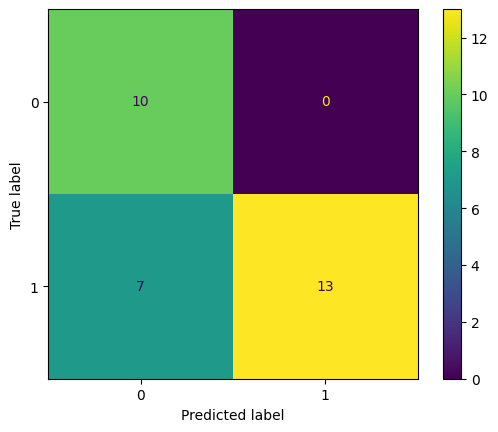

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = gs.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=gs.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gs.best_estimator_.classes_)
disp.plot()
plt.show()

In [13]:
clf = gs
print('AUC: %.3f' % (roc_auc_score(y_test, clf.predict(X_test))))
print('MCC: %.3f' % (matthews_corrcoef(y_test, clf.predict(X_test))))
print('Kappa: %.3f' % (cohen_kappa_score(y_test, clf.predict(X_test))))
print('F1: %.3f' % (f1_score(y_test, clf.predict(X_test))))
print('Accuracy: %.3f' % (accuracy_score(y_test, clf.predict(X_test))))
print('Sensitivity: %.3f' % (recall_score(y_test, clf.predict(X_test))))
print('Specificity: %.3f' % (recall_score(y_test, clf.predict(X_test), pos_label=0)))
print('PPV: %.3f' % (precision_score(y_test, clf.predict(X_test))))
print('NPV: %.3f' % (precision_score(y_test, clf.predict(X_test), pos_label=0)))
print('BalancedAcc: %.3f\n\n' % (balanced_accuracy_score(y_test, clf.predict(X_test))))

AUC: 0.825
MCC: 0.618
Kappa: 0.553
F1: 0.788
Accuracy: 0.767
Sensitivity: 0.650
Specificity: 1.000
PPV: 1.000
NPV: 0.588
BalancedAcc: 0.825




In [ ]:
import pickle
# save
with open('model_normal_MI.pkl','wb') as f:
    pickle.dump(clf,f)

In [ ]:
# load
from pickle import load
with open("model_normal_MI.pkl", "rb") as f:
    clf = load(f)

clf.predict(X_patient_i)
clf.predict_proba(X_patient_i)

In [14]:
clf.predict(X_test)

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1])

In [15]:
Y_test.loc[clf.predict(X_test) != Y_test.to_numpy()].index

NameError: name 'Y_test' is not defined

In [ ]:
Y_test.loc[['Case_P087', 'Case_P010', 'Case_P017', 'Case_P100', 'Case_P051',
       'Case_P026', 'Case_P031']]

ID
Case_P087    1
Case_P010    1
Case_P017    1
Case_P100    1
Case_P051    1
Case_P026    1
Case_P031    1
Name: Label, dtype: int64

[0, 22, 16, 23, 11, 7, 24, 5, 1, 4, 3, 2, 19, 18, 15, 20, 13, 14, 12, 10, 21, 8, 17, 9, 6]
None


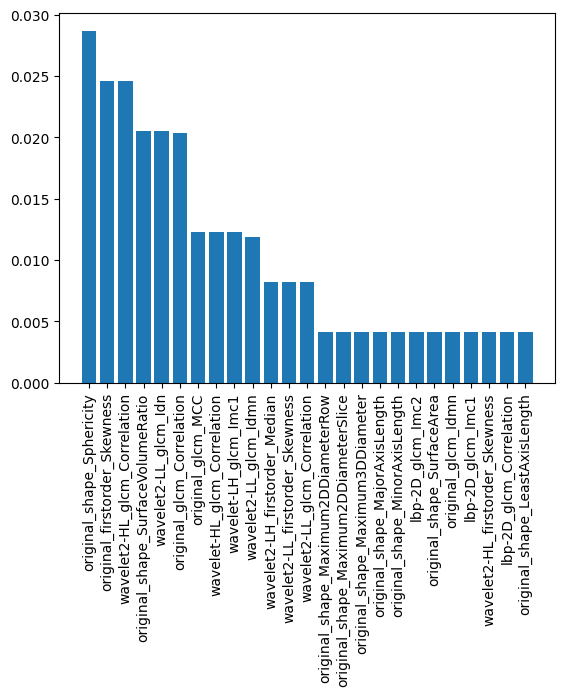

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

# Assume that `pipeline` is your trained Sklearn pipeline
feature_importances = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42
)

import matplotlib.pyplot as plt

features = X_train.columns
importances = feature_importances.importances_mean
importances_nonzero = importances[importances!=0]
features_nonzero = features[importances!=0]
sort_index = np.argsort(np.array(importances_nonzero))
sort_index_list = list(sort_index)
print(list(sort_index))
print(sort_index_list.reverse())
#plt.bar(features, importances)
plt.bar(features_nonzero[sort_index[::-1]], importances_nonzero[sort_index[::-1]])
plt.xticks(rotation=90)
plt.show()

In [ ]:
scaler_var_fs = clf.best_estimator_[:-2]
scaler_var_fs

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('variancethreshold', VarianceThreshold())])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


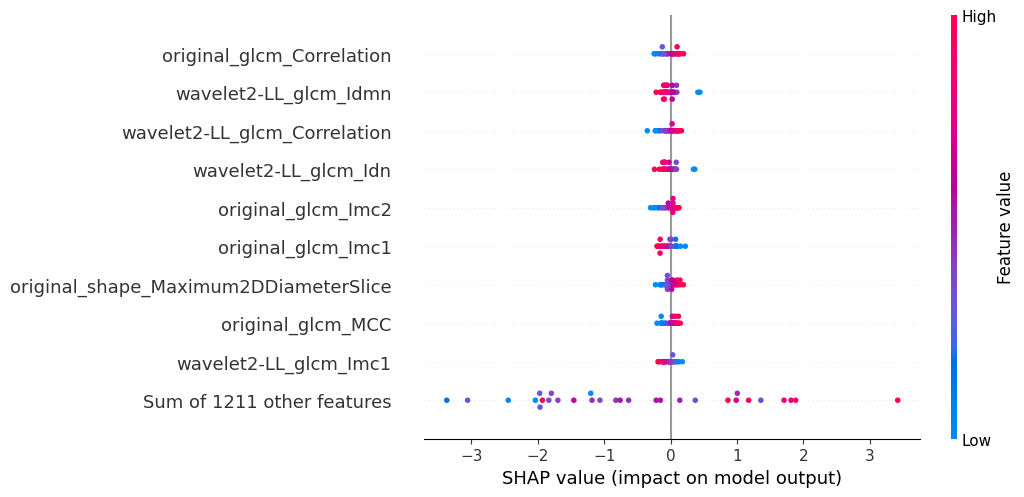

In [ ]:
import shap
explainer = shap.Explainer(clf.best_estimator_[-1], scaler_var_fs.transform(X_train), feature_names=X_train.columns)
shap_values = explainer(scaler_var_fs.transform(X_test))
shap.plots.beeswarm(shap_values)

In [ ]:
patients_with_no_reflow = ['Case_P100', 'Case_P021', 'Case_P019', 'Case_P010', 'Case_P028', 'Case_P043', 
                           'Case_P044', 'Case_P072', 'Case_P081', 'Case_P029', 'Case_P011', 'Case_P074', 
                           'Case_P045', 'Case_P067', 'Case_P069', 'Case_P056', 'Case_P002', 'Case_P005', 
                           'Case_P050', 'Case_P059', 'Case_P092', 'Case_P035', 'Case_P003', 'Case_P078', 
                           'Case_P076', 'Case_P022', 'Case_P077', 'Case_P015', 'Case_P039', 'Case_P001', 
                           'Case_P008', 'Case_P064', 'Case_P063', 'Case_P097', 'Case_P055', 'Case_P036', 
                           'Case_P009', 'Case_P053', 'Case_P096', 'Case_P091']

In [18]:
np.where('P' in list(df_clean.index))

(array([], dtype=int64),)

In [19]:
df.index.map(lambda x: 1 if "P" in x else 0)

Int64Index([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='ID')

In [20]:
df_clean_multiclass = df_clean
df_clean_multiclass.loc[patients_with_no_reflow, "Label"] = 2
list(df_clean_multiclass["Label"])

[0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [21]:
df_clean_mi_nr = df_clean_multiclass
df_clean_mi_nr = df_clean_mi_nr.loc[df_clean_mi_nr["Label"] != 0]
display(df_clean_mi_nr)
Y = df_clean_mi_nr["Label"]
X = df_clean_mi_nr.drop(columns="Label")

test_prcntg = 0.3 #@param {type:"slider", min:0.1, max:0.4, step:0.05}

random_state_value = 1 # necessary for reproducibility


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=test_prcntg, random_state=random_state_value, stratify=Y.to_list())

le = LabelEncoder()
y_train = le.fit_transform(Y_train)
y_test = le.transform(Y_test)

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,lbp-2D_gldm_LowGrayLevelEmphasis,lbp-2D_gldm_SmallDependenceEmphasis,lbp-2D_gldm_SmallDependenceHighGrayLevelEmphasis,lbp-2D_gldm_SmallDependenceLowGrayLevelEmphasis,lbp-2D_ngtdm_Busyness,lbp-2D_ngtdm_Coarseness,lbp-2D_ngtdm_Complexity,lbp-2D_ngtdm_Contrast,lbp-2D_ngtdm_Strength,Label
ID,,,,,,,,,,,,,,,,,,,,,
Case_P100,0.818247,0.792654,73.884831,93.212009,101.518471,101.518471,73.125000,103.609393,133287.451172,76.270463,...,0.048969,0.588903,955.315773,0.043027,18.553401,0.000203,4197.382106,123.154230,0.307708,2
Case_P021,0.956419,0.917472,75.636423,82.440026,88.637693,92.195445,77.308230,93.802069,103476.562500,78.847207,...,0.076117,0.599778,989.253619,0.057756,18.878692,0.000172,4869.810616,157.331408,0.301899,2
Case_P019,0.925677,0.878947,96.883722,110.227058,114.789209,113.634901,95.551442,116.793086,187580.566406,102.034669,...,0.059121,0.522585,862.443929,0.048464,31.640276,0.000115,3942.495514,111.053418,0.181263,2
Case_P026,0.906756,0.772275,75.160226,97.323143,92.195445,95.951241,89.077301,100.723942,114495.117188,88.248297,...,0.046242,0.577870,1006.338018,0.040001,19.401967,0.000181,4168.533170,115.002727,0.277170,1
Case_P010,0.951854,0.916063,71.861843,78.446366,87.500000,89.800125,75.000000,91.448842,133391.601562,74.669489,...,0.070446,0.612496,993.645155,0.058097,24.938346,0.000135,4867.049567,157.507771,0.229803,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Case_P098,0.922061,0.812985,81.074903,99.724989,106.132288,110.290809,80.951374,111.873254,125957.519531,91.952516,...,0.071634,0.622144,1009.759349,0.059076,22.832472,0.000147,4655.097212,146.871192,0.254051,1
Case_P053,0.926841,0.878224,92.735886,105.594832,115.665533,118.592000,92.047033,119.124410,181133.789062,97.869668,...,0.070722,0.590225,911.029579,0.060414,33.566264,0.000117,4199.871577,128.197470,0.178414,2
Case_P096,0.898110,0.855476,80.340428,93.913096,104.193330,104.193330,78.302299,105.684155,134607.421875,84.344304,...,0.060748,0.542236,923.396268,0.045324,23.242322,0.000153,4183.002234,121.746785,0.241228,2


In [22]:
optimization_metric = "MCC" #@param ["AUC", "MCC", "Kappa","F1", "Accuracy", "Sensitivity", "Specificity", "PPV", "NPV", "BalancedAcc"]

if optimization_metric == "AUC":
    score_str = 'roc_auc'
elif optimization_metric == "MCC":
    score_str = make_scorer(matthews_corrcoef)
elif optimization_metric == "Kappa":
    score_str = make_scorer(cohen_kappa_score)
elif optimization_metric == "F1":
    score_str = 'f1'
elif optimization_metric == "Accuracy":
    score_str = 'accuracy'
elif optimization_metric == "Sensitivity":
    score_str = 'recall'
elif optimization_metric == "Specificity":
    score_str = make_scorer(recall_score, pos_label=0)
elif optimization_metric == "PPV":
    score_str = 'precision'
elif optimization_metric == "NPV":
    score_str = make_scorer(precision_score, pos_label=0)
elif optimization_metric == "BalancedAcc":
    score_str = 'balanced_accuracy'

# random_state_value = 1

score_group = {'AUC': 'roc_auc', 
               'MCC': make_scorer(matthews_corrcoef) ,
               'Kappa': make_scorer(cohen_kappa_score), 
               'F1': 'f1', 
               'Accuracy': 'accuracy', 
               'Sensitivity': 'recall', 
               'Specificity': make_scorer(recall_score, pos_label=0),
               'PPV': 'precision', 
               'NPV': make_scorer(precision_score, pos_label=0),
               'BalancedAcc': 'balanced_accuracy'
              }

score_refit_str = optimization_metric

In [42]:
Y = df_clean_multiclass["Label"]
X = df_clean_multiclass.drop(columns="Label")

X = X.iloc[(Y!=0).to_list(),:]
Y = Y[Y != 0]


test_prcntg = 0.3 #@param {type:"slider", min:0.1, max:0.4, step:0.05}

random_state_value = 1 # necessary for reproducibility


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=test_prcntg, random_state=random_state_value, stratify=Y.to_list())

le = LabelEncoder()
y_train = le.fit_transform(Y_train)
y_test = le.transform(Y_test)

In [43]:
y_test

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [44]:
df_ncv_scores = pd.DataFrame(columns = ['Classifier', 'Nested-CV Mean', 'Nested-CV Std'])
if SVM_classifier:
    pipe_svc = make_pipeline(StandardScaler(),
                             fs_method,
                             VarianceThreshold(),
                         SVC(random_state=random_state_value, class_weight="balanced"))

    param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

    param_grid_svc = [{'svc__C': param_range, 
                  'svc__kernel': ['linear']},
                  {'svc__C': param_range, 
                  'svc__gamma': param_range, 
                  'svc__kernel': ['rbf']}]

    gs_svc = GridSearchCV(estimator=pipe_svc, 
                      param_grid=param_grid_svc, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_scv = cross_val_score(gs_svc, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['SVM'], 'Nested-CV Mean': [np.mean(scores_scv)], 'Nested-CV Std': [np.std(scores_scv)]}, columns = ['Classifier', 'Nested-CV Mean', 'Nested-CV Std'])
    df_ncv_scores = df_ncv_scores.append(df_score)
    
if LogisticRegression_classifier:
    pipe_lr = make_pipeline(StandardScaler(),
                             fs_method,
                            VarianceThreshold(),
                        LogisticRegression(random_state=random_state_value, #penalty='elasticnet', 
                                           solver='saga', class_weight="balanced"))

    param_range_lr = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

    param_range_reg_lr = np.linspace(0,1,11)

    param_range_penalty = ['l1']#, 'elasticnet']

    param_grid_lr = {'logisticregression__penalty': param_range_penalty,
                     'logisticregression__C': param_range_lr,
                    #  'logisticregression__l1_ratio': param_range_reg_lr
                     }

    gs_lr = GridSearchCV(estimator=pipe_lr, 
                      param_grid=param_grid_lr, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_lr = cross_val_score(gs_lr, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['Logistic Regression'], 'Nested-CV Mean': [np.mean(scores_lr)], 'Nested-CV Std': [np.std(scores_lr)]})
    df_ncv_scores = df_ncv_scores.append(df_score)

if RandomForest_classifier:
    pipe_rf = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        RandomForestClassifier(n_jobs=-1, class_weight="balanced_subsample", random_state=random_state_value))

    param_range_rf = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

    param_grid_rf = {'randomforestclassifier__n_estimators': param_range_rf,
                    'randomforestclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    gs_rf = GridSearchCV(estimator=pipe_rf, 
                      param_grid=param_grid_rf, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_rf = cross_val_score(gs_rf, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['Random Forest'], 'Nested-CV Mean': [np.mean(scores_rf)], 'Nested-CV Std': [np.std(scores_rf)]})
    df_ncv_scores = df_ncv_scores.append(df_score)

# if MLP_classifier:
#     pipe_mlp = make_pipeline(StandardScaler(),
#                              VarianceThreshold(),
#                         MLPClassifier(random_state=random_state_value, activation='adaptive'))

#     param_hidden_layer_sizes_mlp = [50, 100, 200, 500, 1000, 2000, 4000]
#     param_learnrate_mlp = [0.0001, 0.001, 0.01, 0.1]

#     param_grid_mlp = {'mlpclassifier__hidden_layer_sizes': param_hidden_layer_sizes_mlp,
#                     'mlpclassifier__activation': ['logistic', 'tanh', 'relu'],
#                     'mlpclassifier__learning_rate_init':param_learnrate_mlp}

#     gs_mlp = GridSearchCV(estimator=pipe_mlp, 
#                       param_grid=param_grid_mlp, 
#                       scoring=score_str, 
#                       refit=True,
#                       cv=2,
#                       n_jobs=-1)

#     scores_mlp = cross_val_score(gs_mlp, X_train, y_train, 
#                             scoring=score_str, cv=5)
#     print('MLP CV %s: %.3f +/- %.3f' % (score_str, np.mean(scores_mlp),
#                                           np.std(scores_mlp)))
#     df_score = pd.DataFrame(data={'Classifier': ['MLP'], 'Nested-CV Mean': [np.mean(scores_mlp)], 'Nested-CV Std': [np.std(scores_mlp)]})
#     df_ncv_scores = df_ncv_scores.append(df_score)

if NaiveBayes_classifier:
    pipe_nb = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        GaussianNB())

    param_grid_nb = {}

    gs_nb = GridSearchCV(estimator=pipe_nb, 
                      param_grid=param_grid_nb, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_nb = cross_val_score(gs_nb, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['Naive Bayes'], 'Nested-CV Mean': [np.mean(scores_nb)], 'Nested-CV Std': [np.std(scores_nb)]})
    df_ncv_scores = df_ncv_scores.append(df_score)

if KNN_classifier:
    pipe_knn = make_pipeline(StandardScaler(),
                             VarianceThreshold(),
                             fs_method,
                        KNeighborsClassifier(n_jobs=-1)) # random_state=random_state_value, 

    param_n_neighbors_knn = [2, 3, 4, 5, 6, 7, 8]

    param_grid_knn = {'kneighborsclassifier__n_neighbors': param_n_neighbors_knn,
                    'kneighborsclassifier__weights': ['uniform', 'distance']}

    gs_knn = GridSearchCV(estimator=pipe_knn, 
                      param_grid=param_grid_knn, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_knn = cross_val_score(gs_knn, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['KNN'], 'Nested-CV Mean': [np.mean(scores_knn)], 'Nested-CV Std': [np.std(scores_knn)]})
    df_ncv_scores = df_ncv_scores.append(df_score)

if GradientBoosting_classifier:
    pipe_gb = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        GradientBoostingClassifier(random_state=random_state_value))

    param_range_gb = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
    param_learnrate_gb = [0.0001, 0.001, 0.01, 0.1]

    param_grid_gb = {'gradientboostingclassifier__n_estimators': param_range_gb,
                    'gradientboostingclassifier__learning_rate': param_learnrate_gb}

    gs_gb = GridSearchCV(estimator=pipe_gb, 
                      param_grid=param_grid_gb, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_gb = cross_val_score(gs_gb, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['Gradient Boosting'], 'Nested-CV Mean': [np.mean(scores_gb)], 'Nested-CV Std': [np.std(scores_gb)]})
    df_ncv_scores = df_ncv_scores.append(df_score)

df_ncv_scores.sort_values(by=df_ncv_scores.columns[1], ascending=False)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiom

,Classifier,Nested-CV Mean,Nested-CV Std
0,Logistic Regression,0.242373,0.342739
0,Gradient Boosting,0.071925,0.307204
0,Random Forest,0.039218,0.316469
0,SVM,-0.020000,0.512445
0,KNN,-0.042481,0.154028
0,Naive Bayes,-0.066056,0.329970


In [46]:
selected_model = 'LogisticRegression' #@param ['SVM', 'LogisticRegression', 'RandomForest', 'NaiveBayes', 'KNN', 'GradientBoosting']

number_folds = 4

if selected_model == 'SVM':
  pipe_svc = make_pipeline(StandardScaler(),
                           VarianceThreshold(),
                           fs_method,
                           SVC(random_state=random_state_value, class_weight="balanced"))

  param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

  param_grid_svc = [{'svc__C': param_range, 
                'svc__kernel': ['linear']},
                {'svc__C': param_range, 
                'svc__gamma': param_range, 
                'svc__kernel': ['rbf']}]

  gs_svc = GridSearchCV(estimator=pipe_svc, 
                    param_grid=param_grid_svc, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)

  gs = gs_svc.fit(X_train, y_train)
  clf_svc = gs.best_estimator_
          
elif selected_model == 'LogisticRegression':
  pipe_lr = make_pipeline(StandardScaler(),
                          VarianceThreshold(),
                          fs_method,
                          LogisticRegression(penalty='elasticnet', random_state=random_state_value,
                                            solver='saga', class_weight="balanced"))

  param_range_lr = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

  param_l1_ratio_lr = np.linspace(0,1,11)

  param_range_penalty = ['l1', 'elasticnet']

  param_grid_lr = {'logisticregression__penalty': param_range_penalty,
                   'logisticregression__C': param_range_lr,
                   'logisticregression__l1_ratio': param_range_reg_lr}

  gs_lr = GridSearchCV(estimator=pipe_lr, 
                    param_grid=param_grid_lr, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)

  gs = gs_lr.fit(X_train, y_train)
  clf_lr = gs.best_estimator_

elif selected_model == 'RandomForest':
  pipe_rf = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        RandomForestClassifier(n_jobs=-1, class_weight="balanced_subsample", random_state=random_state_value))

  param_range_rf = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

  param_grid_rf = {'randomforestclassifier__n_estimators': param_range_rf,
                  'randomforestclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

  gs_rf = GridSearchCV(estimator=pipe_rf, 
                    param_grid=param_grid_rf, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)
  gs = gs_rf.fit(X_train, y_train)
  clf_rf = gs.best_estimator_

elif selected_model == 'MLP':
  pipe_mlp = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        MLPClassifier(random_state=random_state_value, activation='adaptive'))

  param_hidden_layer_sizes_mlp = [50, 100, 200, 500, 1000, 2000, 4000]
  param_learnrate_mlp = [0.0001, 0.001, 0.01, 0.1]

  param_grid_mlp = {'mlpclassifier__hidden_layer_sizes': param_hidden_layer_sizes_mlp,
                  'mlpclassifier__activation': ['logistic', 'tanh', 'relu'],
                  'mlpclassifier__learning_rate_init':param_learnrate_mlp}

  gs_mlp = GridSearchCV(estimator=pipe_mlp, 
                    param_grid=param_grid_mlp, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)
  gs = gs_mlp.fit(X_train, y_train)
  clf_mlp = gs.best_estimator_

elif selected_model == 'NaiveBayes':
  pipe_nb = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                          GaussianNB())

  param_grid_nb = {}

  gs_nb = GridSearchCV(estimator=pipe_nb, 
                    param_grid=param_grid_nb, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)
  gs = gs_nb.fit(X_train, y_train)
  clf_nb = gs.best_estimator_
  
elif selected_model == 'KNN':
  pipe_knn = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        KNeighborsClassifier(n_jobs=-1)) # random_state=random_state_value, 

  param_n_neighbors_knn = [2, 3, 4, 5, 6, 7, 8]

  param_grid_knn = {'kneighborsclassifier__n_neighbors': param_n_neighbors_knn,
                  'kneighborsclassifier__weights': ['uniform', 'distance']}

  gs_knn = GridSearchCV(estimator=pipe_knn, 
                    param_grid=param_grid_knn, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)
  gs = gs_knn.fit(X_train, y_train)
  clf_knn = gs.best_estimator_
  
elif selected_model == 'GradientBoosting':
  pipe_gb = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        GradientBoostingClassifier(random_state=random_state_value))

  param_range_gb = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
  param_learnrate_gb = [0.0001, 0.001, 0.01, 0.1]

  param_grid_gb = {'gradientboostingclassifier__n_estimators': param_range_gb,
                  'gradientboostingclassifier__learning_rate': param_learnrate_gb}

  gs_gb = GridSearchCV(estimator=pipe_gb, 
                    param_grid=param_grid_gb, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)
  gs = gs_gb.fit(X_train, y_train)
  clf_gb = gs.best_estimator_

print(gs.best_params_)
for key in score_group:
    if len(gs.cv_results_['std_test_'+key][gs.cv_results_['rank_test_'+key]==1])>1:
        print('CV %s: %.3f +/- %.3f' % (key,
                                        gs.cv_results_['mean_test_'+key][gs.cv_results_['rank_test_'+key]==1][0],
                                        gs.cv_results_['std_test_'+key][gs.cv_results_['rank_test_'+key]==1][0]))
    else:
        print('CV %s: %.3f +/- %.3f' % (key,
                                        gs.cv_results_['mean_test_'+key][gs.cv_results_['rank_test_'+key]==1],
                                        gs.cv_results_['std_test_'+key][gs.cv_results_['rank_test_'+key]==1]))




/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classificati

{'logisticregression__C': 0.001, 'logisticregression__l1_ratio': 0.0, 'logisticregression__penalty': 'elasticnet'}
CV AUC: 0.686 +/- 0.150
CV MCC: 0.412 +/- 0.187
CV Kappa: 0.338 +/- 0.185
CV F1: 0.739 +/- 0.026
CV Accuracy: 0.676 +/- 0.087
CV Sensitivity: 1.000 +/- 0.000
CV Specificity: 0.700 +/- 0.332
CV PPV: 0.826 +/- 0.175
CV NPV: 0.681 +/- 0.194
CV BalancedAcc: 0.677 +/- 0.108


/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [47]:
clf = gs
print('AUC: %.3f' % (roc_auc_score(y_test, clf.predict(X_test),multi_class='ovr', average='micro')))
print('MCC: %.3f' % (matthews_corrcoef(y_test, clf.predict(X_test))))
print('Kappa: %.3f' % (cohen_kappa_score(y_test, clf.predict(X_test))))
print('F1: %.3f' % (f1_score(y_test, clf.predict(X_test))))
print('Accuracy: %.3f' % (accuracy_score(y_test, clf.predict(X_test))))
print('Sensitivity: %.3f' % (recall_score(y_test, clf.predict(X_test))))
print('Specificity: %.3f' % (recall_score(y_test, clf.predict(X_test), pos_label=0)))
print('PPV: %.3f' % (precision_score(y_test, clf.predict(X_test))))
print('NPV: %.3f' % (precision_score(y_test, clf.predict(X_test), pos_label=0)))
print('BalancedAcc: %.3f\n\n' % (balanced_accuracy_score(y_test, clf.predict(X_test))))

AUC: 0.558
MCC: 0.113
Kappa: 0.113
F1: 0.640
Accuracy: 0.571
Sensitivity: 0.615
Specificity: 0.500
PPV: 0.667
NPV: 0.444
BalancedAcc: 0.558




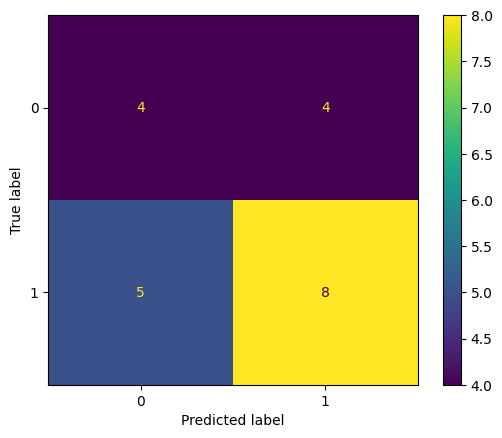

In [49]:
predictions = gs.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=gs.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gs.best_estimator_.classes_)
disp.plot()
plt.show()

In [50]:
clf.predict(X_test)

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


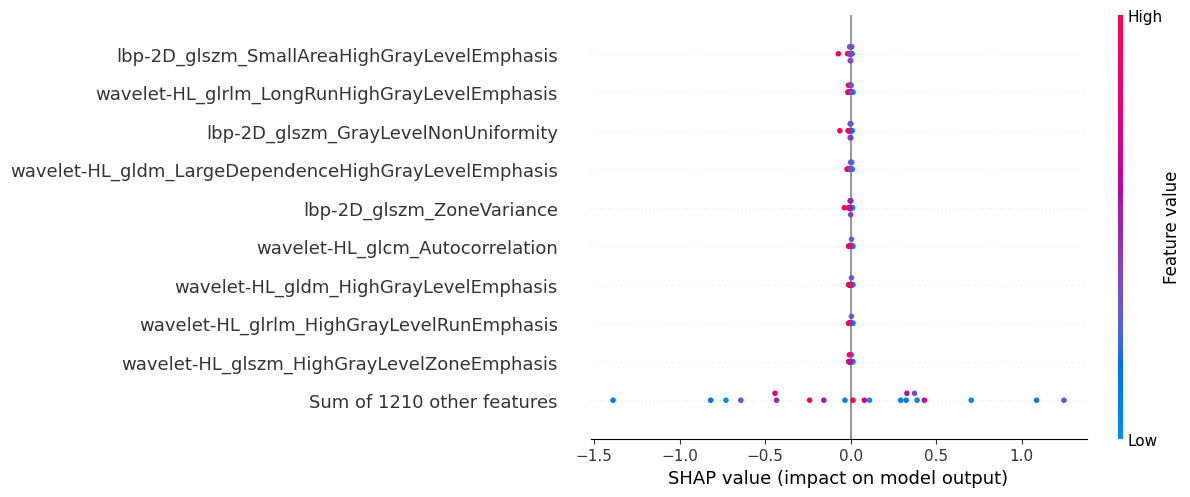

In [51]:
scaler_var_fs = clf.best_estimator_[:-2]
explainer = shap.Explainer(clf.best_estimator_[-1], scaler_var_fs.transform(X_train), feature_names=X_train.columns)
shap_values = explainer(scaler_var_fs.transform(X_test))
shap.plots.beeswarm(shap_values)

In [102]:
df.index.map(lambda x: 1 if "P" in x else (2)).map(lambda x: 2 if "P" x in patients_with_no_reflow else 1)

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='ID')

In [203]:
optimization_metric = "AUC" #@param ["AUC", "MCC", "Kappa","F1", "Accuracy", "Sensitivity", "Specificity", "PPV", "NPV", "BalancedAcc"]

if optimization_metric == "AUC":
    score_str = 'roc_auc_ovo_weighted'
elif optimization_metric == "MCC":
    score_str = make_scorer(matthews_corrcoef)
elif optimization_metric == "Kappa":
    score_str = make_scorer(cohen_kappa_score)
elif optimization_metric == "F1":
    score_str = 'f1_weighted'
elif optimization_metric == "Accuracy":
    score_str = 'accuracy'
elif optimization_metric == "Sensitivity":
    score_str = 'recall'
elif optimization_metric == "Specificity":
    score_str = make_scorer(recall_score, pos_label=0)
elif optimization_metric == "PPV":
    score_str = 'precision'
elif optimization_metric == "NPV":
    score_str = make_scorer(precision_score, pos_label=0)
elif optimization_metric == "BalancedAcc":
    score_str = 'balanced_accuracy'

# random_state_value = 1

score_group = {#'AUC': make_scorer(roc_auc_score, )'roc_auc_ovo_weighted', 
               #'MCC': make_scorer(matthews_corrcoef) ,
               #'Kappa': make_scorer(cohen_kappa_score), 
               'F1': 'f1_weighted', 
               #'Accuracy': 'accuracy', 
               #'Sensitivity': 'recall_weighted', 
               #'Specificity': make_scorer(recall_score, average='average', pos_label=0),
               #'PPV': 'precision_weighted', 
               #'NPV': make_scorer(precision_score, average='average', pos_label=0),
               #'BalancedAcc': 'balanced_accuracy'
              }

score_refit_str = optimization_metric

In [200]:
clf = LogisticRegression(
        solver="saga", max_iter=100, random_state=42, multi_class='multinomial'
    ).fit(X_train, y_train)
clf.predict(X_test)

The max_iter was reached which means the coef_ did not converge


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was 

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter

In [201]:
df_ncv_scores = pd.DataFrame(columns = ['Classifier', 'Nested-CV Mean', 'Nested-CV Std'])
if SVM_classifier:
    pipe_svc = make_pipeline(StandardScaler(),
                             fs_method,
                             VarianceThreshold(),
                         SVC(random_state=random_state_value))

    param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

    param_grid_svc = [{'svc__C': param_range, 
                  'svc__kernel': ['linear']},
                  {'svc__C': param_range, 
                  'svc__gamma': param_range, 
                  'svc__kernel': ['rbf']}]

    gs_svc = GridSearchCV(estimator=pipe_svc, 
                      param_grid=param_grid_svc, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_scv = cross_val_score(gs_svc, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['SVM'], 'Nested-CV Mean': [np.mean(scores_scv)], 'Nested-CV Std': [np.std(scores_scv)]}, columns = ['Classifier', 'Nested-CV Mean', 'Nested-CV Std'])
    df_ncv_scores = df_ncv_scores.append(df_score)
    
if LogisticRegression_classifier:
    pipe_lr = make_pipeline(StandardScaler(),
                             fs_method,
                            VarianceThreshold(),
                        LogisticRegression(random_state=random_state_value, #penalty='elasticnet', 
                                           solver='saga'))

    param_range_lr = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

    param_range_reg_lr = np.linspace(0,1,11)

    param_range_penalty = ['l1']#, 'elasticnet']

    param_grid_lr = {'logisticregression__penalty': param_range_penalty,
                     'logisticregression__C': param_range_lr,
                    #  'logisticregression__l1_ratio': param_range_reg_lr
                     }

    gs_lr = GridSearchCV(estimator=pipe_lr, 
                      param_grid=param_grid_lr, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_lr = cross_val_score(gs_lr, X_train, y_train, 
                                scoring=score_str, 
                                cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['Logistic Regression'], 'Nested-CV Mean': [np.mean(scores_lr)], 'Nested-CV Std': [np.std(scores_lr)]})
    df_ncv_scores = df_ncv_scores.append(df_score)

if RandomForest_classifier:
    pipe_rf = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        RandomForestClassifier(n_jobs=-1, random_state=random_state_value))

    param_range_rf = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

    param_grid_rf = {'randomforestclassifier__n_estimators': param_range_rf,
                    'randomforestclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    gs_rf = GridSearchCV(estimator=pipe_rf, 
                      param_grid=param_grid_rf, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_rf = cross_val_score(gs_rf, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['Random Forest'], 'Nested-CV Mean': [np.mean(scores_rf)], 'Nested-CV Std': [np.std(scores_rf)]})
    df_ncv_scores = df_ncv_scores.append(df_score)

# if MLP_classifier:
#     pipe_mlp = make_pipeline(StandardScaler(),
#                              VarianceThreshold(),
#                         MLPClassifier(random_state=random_state_value, activation='adaptive'))

#     param_hidden_layer_sizes_mlp = [50, 100, 200, 500, 1000, 2000, 4000]
#     param_learnrate_mlp = [0.0001, 0.001, 0.01, 0.1]

#     param_grid_mlp = {'mlpclassifier__hidden_layer_sizes': param_hidden_layer_sizes_mlp,
#                     'mlpclassifier__activation': ['logistic', 'tanh', 'relu'],
#                     'mlpclassifier__learning_rate_init':param_learnrate_mlp}

#     gs_mlp = GridSearchCV(estimator=pipe_mlp, 
#                       param_grid=param_grid_mlp, 
#                       scoring=score_str, 
#                       refit=True,
#                       cv=2,
#                       n_jobs=-1)

#     scores_mlp = cross_val_score(gs_mlp, X_train, y_train, 
#                             scoring=score_str, cv=5)
#     print('MLP CV %s: %.3f +/- %.3f' % (score_str, np.mean(scores_mlp),
#                                           np.std(scores_mlp)))
#     df_score = pd.DataFrame(data={'Classifier': ['MLP'], 'Nested-CV Mean': [np.mean(scores_mlp)], 'Nested-CV Std': [np.std(scores_mlp)]})
#     df_ncv_scores = df_ncv_scores.append(df_score)

if NaiveBayes_classifier:
    pipe_nb = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        GaussianNB())

    param_grid_nb = {}

    gs_nb = GridSearchCV(estimator=pipe_nb, 
                      param_grid=param_grid_nb, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_nb = cross_val_score(gs_nb, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['Naive Bayes'], 'Nested-CV Mean': [np.mean(scores_nb)], 'Nested-CV Std': [np.std(scores_nb)]})
    df_ncv_scores = df_ncv_scores.append(df_score)

if KNN_classifier:
    pipe_knn = make_pipeline(StandardScaler(),
                             VarianceThreshold(),
                             fs_method,
                        KNeighborsClassifier(n_jobs=-1)) # random_state=random_state_value, 

    param_n_neighbors_knn = [2, 3, 4, 5, 6, 7, 8]

    param_grid_knn = {'kneighborsclassifier__n_neighbors': param_n_neighbors_knn,
                    'kneighborsclassifier__weights': ['uniform', 'distance']}

    gs_knn = GridSearchCV(estimator=pipe_knn, 
                      param_grid=param_grid_knn, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_knn = cross_val_score(gs_knn, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['KNN'], 'Nested-CV Mean': [np.mean(scores_knn)], 'Nested-CV Std': [np.std(scores_knn)]})
    df_ncv_scores = df_ncv_scores.append(df_score)

if GradientBoosting_classifier:
    pipe_gb = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        GradientBoostingClassifier(random_state=random_state_value))

    param_range_gb = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
    param_learnrate_gb = [0.0001, 0.001, 0.01, 0.1]

    param_grid_gb = {'gradientboostingclassifier__n_estimators': param_range_gb,
                    'gradientboostingclassifier__learning_rate': param_learnrate_gb}

    gs_gb = GridSearchCV(estimator=pipe_gb, 
                      param_grid=param_grid_gb, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_gb = cross_val_score(gs_gb, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['Gradient Boosting'], 'Nested-CV Mean': [np.mean(scores_gb)], 'Nested-CV Std': [np.std(scores_gb)]})
    df_ncv_scores = df_ncv_scores.append(df_score)

df_ncv_scores.sort_values(by=df_ncv_scores.columns[1], ascending=False)

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was 

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 107, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 302, in _s

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 107, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 302, in _s

  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/utils/_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/pipeline.py", line 47, in check
    getattr(self._final_estimator, attr)
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/utils/_available_if.py", line 32, in __get__
  

Traceback (most recent call last):
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/utils/_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-pa

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Classifier,Nested-CV Mean,Nested-CV Std
0,Logistic Regression,0.854048,0.046571
0,Random Forest,0.804286,0.085185
0,Naive Bayes,0.794167,0.062221
0,KNN,0.732887,0.081178
0,Gradient Boosting,0.727857,0.080193
0,SVM,NaN,NaN


In [206]:
selected_model = 'LogisticRegression' #@param ['SVM', 'LogisticRegression', 'RandomForest', 'NaiveBayes', 'KNN', 'GradientBoosting']

number_folds = 4

if selected_model == 'SVM':
  pipe_svc = make_pipeline(StandardScaler(),
                           VarianceThreshold(),
                           fs_method,
                           SVC(random_state=random_state_value))

  param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

  param_grid_svc = [{'svc__C': param_range, 
                'svc__kernel': ['linear']},
                {'svc__C': param_range, 
                'svc__gamma': param_range, 
                'svc__kernel': ['rbf']}]

  gs_svc = GridSearchCV(estimator=pipe_svc, 
                    param_grid=param_grid_svc, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)

  gs = gs_svc.fit(X_train, y_train)
  clf_svc = gs.best_estimator_
          
elif selected_model == 'LogisticRegression':
  pipe_lr = make_pipeline(StandardScaler(),
                          VarianceThreshold(),
                          fs_method,
                          LogisticRegression(penalty='elasticnet', multi_class='multinomial',random_state=random_state_value,
                                            solver='saga'))

  param_range_lr = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

  param_l1_ratio_lr = np.linspace(0,1,11)

  param_range_penalty = ['l1', 'elasticnet']

  param_grid_lr = {'logisticregression__penalty': param_range_penalty,
                   'logisticregression__C': param_range_lr,
                   'logisticregression__l1_ratio': param_range_reg_lr}

  gs_lr = GridSearchCV(estimator=pipe_lr, 
                    param_grid=param_grid_lr, 
                    scoring='f1_weighted',#score_group, 
                    refit=True,#score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)

  gs = gs_lr.fit(X_train, y_train)
  clf_lr = gs.best_estimator_

elif selected_model == 'RandomForest':
  pipe_rf = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        RandomForestClassifier(n_jobs=-1, random_state=random_state_value))

  param_range_rf = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

  param_grid_rf = {'randomforestclassifier__n_estimators': param_range_rf,
                  'randomforestclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

  gs_rf = GridSearchCV(estimator=pipe_rf, 
                    param_grid=param_grid_rf, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)
  gs = gs_rf.fit(X_train, y_train)
  clf_rf = gs.best_estimator_

elif selected_model == 'MLP':
  pipe_mlp = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        MLPClassifier(random_state=random_state_value, activation='adaptive'))

  param_hidden_layer_sizes_mlp = [50, 100, 200, 500, 1000, 2000, 4000]
  param_learnrate_mlp = [0.0001, 0.001, 0.01, 0.1]

  param_grid_mlp = {'mlpclassifier__hidden_layer_sizes': param_hidden_layer_sizes_mlp,
                  'mlpclassifier__activation': ['logistic', 'tanh', 'relu'],
                  'mlpclassifier__learning_rate_init':param_learnrate_mlp}

  gs_mlp = GridSearchCV(estimator=pipe_mlp, 
                    param_grid=param_grid_mlp, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)
  gs = gs_mlp.fit(X_train, y_train)
  clf_mlp = gs.best_estimator_

elif selected_model == 'NaiveBayes':
  pipe_nb = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                          GaussianNB())

  param_grid_nb = {}

  gs_nb = GridSearchCV(estimator=pipe_nb, 
                    param_grid=param_grid_nb, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)
  gs = gs_nb.fit(X_train, y_train)
  clf_nb = gs.best_estimator_
  
elif selected_model == 'KNN':
  pipe_knn = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        KNeighborsClassifier(n_jobs=-1)) # random_state=random_state_value, 

  param_n_neighbors_knn = [2, 3, 4, 5, 6, 7, 8]

  param_grid_knn = {'kneighborsclassifier__n_neighbors': param_n_neighbors_knn,
                  'kneighborsclassifier__weights': ['uniform', 'distance']}

  gs_knn = GridSearchCV(estimator=pipe_knn, 
                    param_grid=param_grid_knn, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)
  gs = gs_knn.fit(X_train, y_train)
  clf_knn = gs.best_estimator_
  
elif selected_model == 'GradientBoosting':
  pipe_gb = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                             fs_method,
                        GradientBoostingClassifier(random_state=random_state_value))

  param_range_gb = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
  param_learnrate_gb = [0.0001, 0.001, 0.01, 0.1]

  param_grid_gb = {'gradientboostingclassifier__n_estimators': param_range_gb,
                  'gradientboostingclassifier__learning_rate': param_learnrate_gb}

  gs_gb = GridSearchCV(estimator=pipe_gb, 
                    param_grid=param_grid_gb, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)
  gs = gs_gb.fit(X_train, y_train)
  clf_gb = gs.best_estimator_

print(gs.best_params_)
for key in score_group:
    if len(gs.cv_results_['std_test_'+key][gs.cv_results_['rank_test_'+key]==1])>1:
        print('CV %s: %.3f +/- %.3f' % (key,
                                        gs.cv_results_['mean_test_'+key][gs.cv_results_['rank_test_'+key]==1][0],
                                        gs.cv_results_['std_test_'+key][gs.cv_results_['rank_test_'+key]==1][0]))
    else:
        print('CV %s: %.3f +/- %.3f' % (key,
                                        gs.cv_results_['mean_test_'+key][gs.cv_results_['rank_test_'+key]==1],
                                        gs.cv_results_['std_test_'+key][gs.cv_results_['rank_test_'+key]==1]))




{'logisticregression__C': 1.0, 'logisticregression__l1_ratio': 0.5, 'logisticregression__penalty': 'elasticnet'}


The max_iter was reached which means the coef_ did not converge


KeyError: 'std_test_F1'

In [207]:
gs.cv_results_

{'mean_fit_time': array([0.01972902, 0.03870672, 0.0178957 , 0.01777184, 0.01446903,
        0.01799029, 0.01779878, 0.01313478, 0.0164656 , 0.01436198,
        0.01513606, 0.0139243 , 0.014126  , 0.01360828, 0.01538306,
        0.01560122, 0.01359564, 0.012214  , 0.01356006, 0.01198965,
        0.01310408, 0.01196778, 0.01187354, 0.03291953, 0.01368582,
        0.0121997 , 0.01361537, 0.01229995, 0.01521307, 0.01455015,
        0.01417083, 0.01273078, 0.01258415, 0.01245052, 0.01237565,
        0.01543599, 0.013376  , 0.01243728, 0.01452154, 0.01151341,
        0.01523536, 0.01383269, 0.01333618, 0.01392239, 0.01322299,
        0.0354743 , 0.01248896, 0.03015846, 0.01217437, 0.01396048,
        0.01324844, 0.01352835, 0.01408583, 0.0133667 , 0.01494694,
        0.01483685, 0.01221764, 0.01426208, 0.01256967, 0.01319754,
        0.01207626, 0.01370341, 0.01381028, 0.01291746, 0.01245165,
        0.01132816, 0.03745747, 0.03057724, 0.03782254, 0.03567678,
        0.03622103, 0.03559345,

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: Use

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_r

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: Use

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was 

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logisti

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: Use

In [164]:
clf = gs
print('AUC: %.3f' % (roc_auc_score(y_test, clf.predict(X_test))))
print('MCC: %.3f' % (matthews_corrcoef(y_test, clf.predict(X_test))))
print('Kappa: %.3f' % (cohen_kappa_score(y_test, clf.predict(X_test))))
print('F1: %.3f' % (f1_score(y_test, clf.predict(X_test))))
print('Accuracy: %.3f' % (accuracy_score(y_test, clf.predict(X_test))))
print('Sensitivity: %.3f' % (recall_score(y_test, clf.predict(X_test))))
print('Specificity: %.3f' % (recall_score(y_test, clf.predict(X_test), pos_label=0)))
print('PPV: %.3f' % (precision_score(y_test, clf.predict(X_test))))
print('NPV: %.3f' % (precision_score(y_test, clf.predict(X_test), pos_label=0)))
print('BalancedAcc: %.3f\n\n' % (balanced_accuracy_score(y_test, clf.predict(X_test))))

AUC: 0.572
MCC: 0.155
Kappa: 0.152
F1: 0.714
Accuracy: 0.619
Sensitivity: 0.769
Specificity: 0.375
PPV: 0.667
NPV: 0.500
BalancedAcc: 0.572




No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


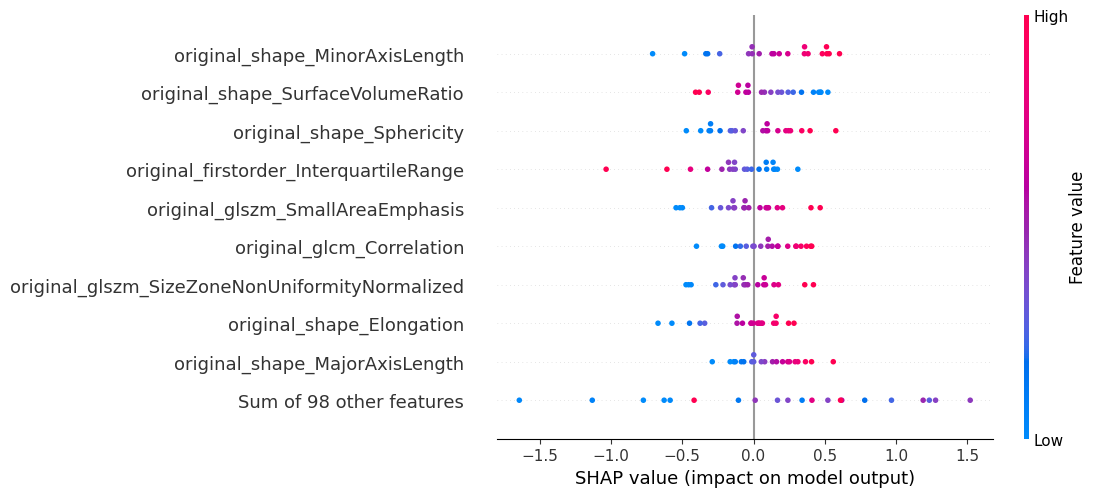

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_d

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_d

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio p

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_d

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_d

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio p

/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaosantinha/miniconda3/envs/Radiomics3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarni

In [165]:
scaler_var_fs = clf.best_estimator_[:-2]
explainer = shap.Explainer(clf.best_estimator_[-1], scaler_var_fs.transform(X_train), feature_names=X_train.columns)
shap_values = explainer(scaler_var_fs.transform(X_test))
shap.plots.beeswarm(shap_values)